In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
metricsDir = './out/metrics'
graphsDir = './out/graphs'
df = pd.read_excel('results-javascript.xlsx')

In [84]:
def metrics(df,column,metricsDir,graphsDir):
    mean = df[column].mean()
    median = df[column].median()
    stdev = df[column].std()
    stats = f'{column}\nMean: {mean}\nMedian: {median}\nStdDev: {stdev}'
    with open(f'./out/metrics/{column}.txt',"w") as f:
        f.write(stats)
    print(stats)
    boxplot(df,column,graphsDir)
    print()
def boxplot(df,column,graphsDir):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
    df_filtered = df.loc[filter]
    ax = df_filtered.boxplot(column,rot=10)
    ax.set_xlabel("")
    ax.set_ylabel(f"# of {column}")
    ax.set_title(column)
    plt.show()
    fig = ax.get_figure()
    fig.savefig(f'./out/graphs/{column}.pdf')

commits
Mean: 403.26189086163674
Median: 107.0
StdDev: 1407.357440778647


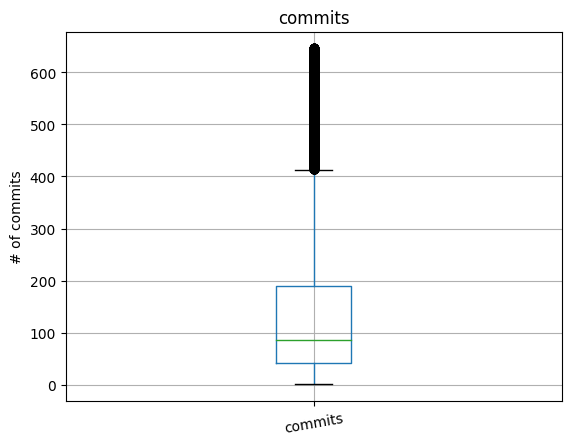


branches
Mean: 9.859782272742883
Median: 3.0
StdDev: 39.17138619105233


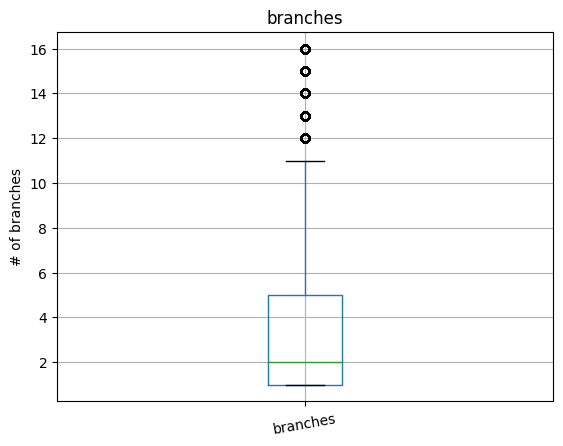


releases
Mean: 17.779971839692298
Median: 7.0
StdDev: 59.019702215184616


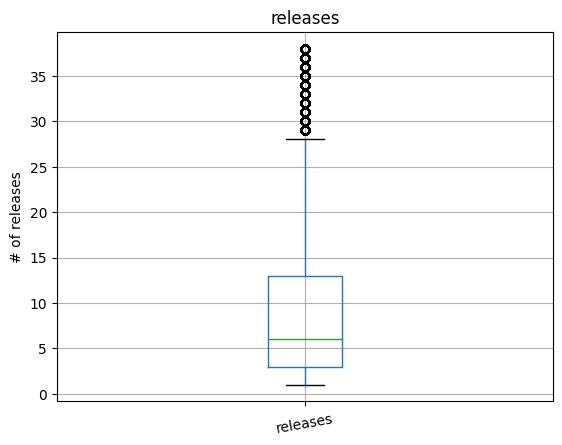


contributors
Mean: 11.350801881932759
Median: 5.0
StdDev: 29.640616049243974


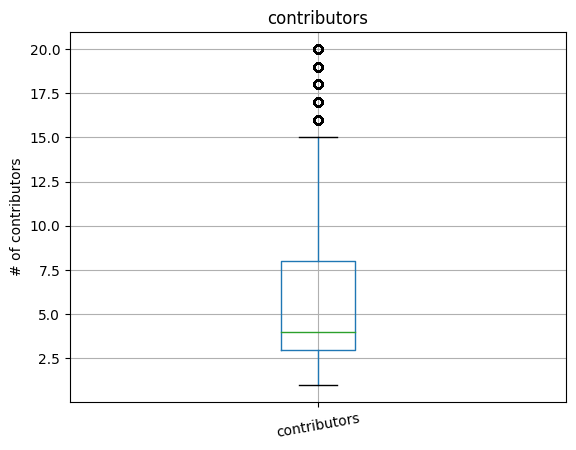


watchers
Mean: 20.072478450496238
Median: 7.0
StdDev: 79.57310904116926


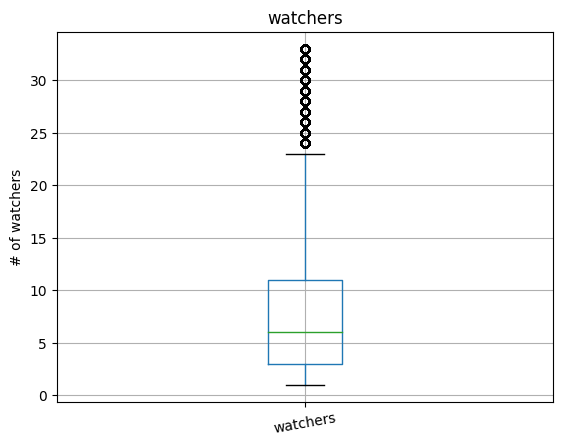


stargazers
Mean: 411.7761427246815
Median: 50.0
StdDev: 2032.1438781148925


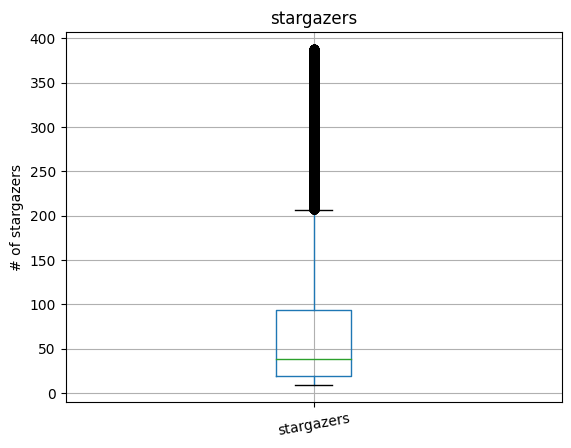


forks
Mean: 74.05650949551838
Median: 14.0
StdDev: 469.134762075908


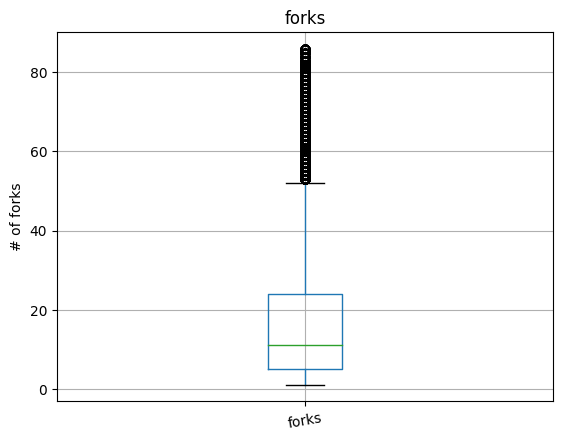


size
Mean: 17389.014784161544
Median: 838.0
StdDev: 225132.82693979618


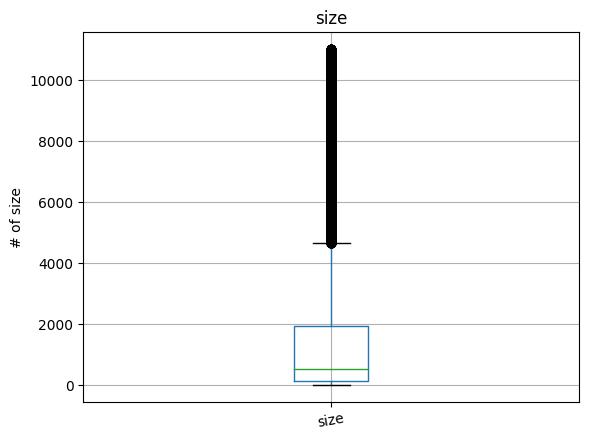


totalIssues
Mean: 81.21314262165596
Median: 15.0
StdDev: 382.87523798762913


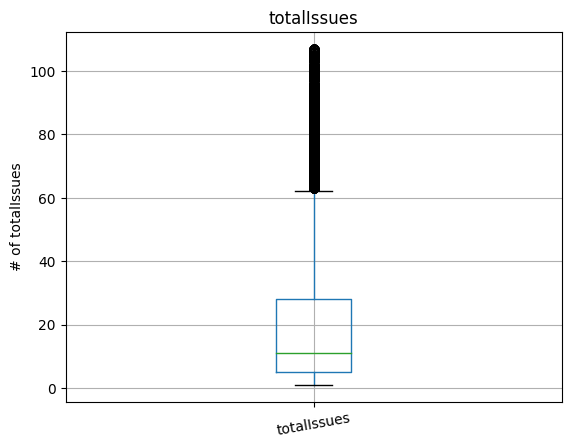


openIssues
Mean: 16.11367148597136
Median: 4.0
StdDev: 71.5781830916759


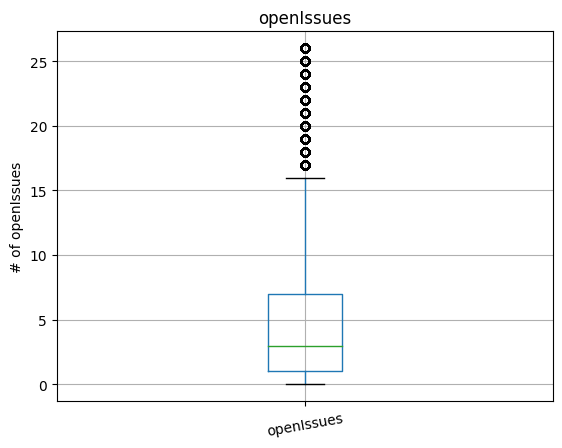


totalPullRequests
Mean: 87.50820769944023
Median: 15.0
StdDev: 412.3616158961493


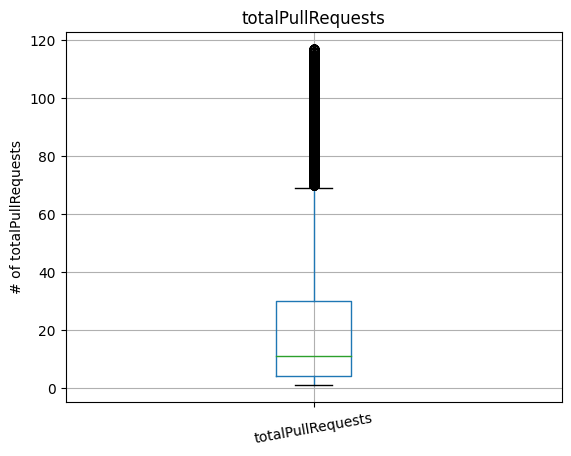


openPullRequests
Mean: 3.5861808441223944
Median: 1.0
StdDev: 13.928422154051924


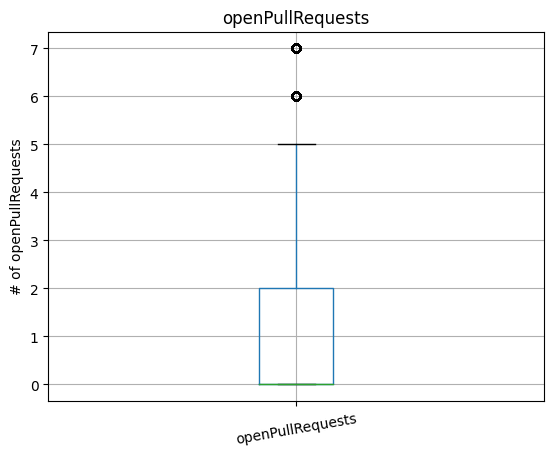

In [85]:
for col in df.columns:
    if df.dtypes[col] == 'int64':
        metrics(df,col,metricsDir,graphsDir)